# Results of different #agent values

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset=['planner', 'damage', 'num_agents'])
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()

results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,1.3,5.0,237.293644,0.011572,8208.053214,32.8
1,IterativeAssignmentPlanner,100,10.0,1.3,5.0,242.541934,0.038428,16198.821649,66.6
2,IterativeAssignmentPlanner,200,10.0,1.3,5.0,247.380838,0.137999,34144.512866,116.6
3,IterativeAssignmentPlanner,300,10.0,1.3,5.0,253.142292,0.274000,52897.230791,162.2
4,IterativeAssignmentPlanner,400,10.0,1.3,5.0,251.929335,0.446441,71272.322992,208.0


In [11]:
planners_names = ['IterativeAssignmentPlanner', 'KmeansAssignmentPlanner',
                  'StaticLinePlanner', 'TravelingLinePlanner', 'SeparateTravelingPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:orange','tab:green']

for name in planners_names:
    print(f'{name}: {results[results.planner == name].shape[0]}')

planners_results = [results.loc[results['planner'] == name] for name in planners_names]
planners_results[0].head(11)

IterativeAssignmentPlanner: 11
KmeansAssignmentPlanner: 11
StaticLinePlanner: 11
TravelingLinePlanner: 0
SeparateTravelingPlanner: 0


,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,1.3,5.0,237.293644,0.011572,8208.053214,32.8
1,IterativeAssignmentPlanner,100,10.0,1.3,5.0,242.541934,0.038428,16198.821649,66.6
2,IterativeAssignmentPlanner,200,10.0,1.3,5.0,247.380838,0.137999,34144.512866,116.6
3,IterativeAssignmentPlanner,300,10.0,1.3,5.0,253.142292,0.274000,52897.230791,162.2
4,IterativeAssignmentPlanner,400,10.0,1.3,5.0,251.929335,0.446441,71272.322992,208.0
5,IterativeAssignmentPlanner,500,10.0,1.3,5.0,254.785753,0.675188,90891.983623,249.6
6,IterativeAssignmentPlanner,600,10.0,1.3,5.0,258.031847,0.951567,110394.096702,286.4
7,IterativeAssignmentPlanner,700,10.0,1.3,5.0,257.793868,1.264413,131555.993949,313.0
8,IterativeAssignmentPlanner,800,10.0,1.3,5.0,262.419063,1.617286,152724.258187,345.6
9,IterativeAssignmentPlanner,900,10.0,1.3,5.0,262.779913,1.987838,171782.077029,378.8


## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

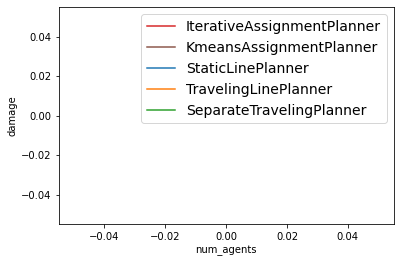

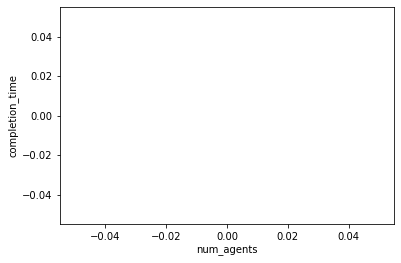

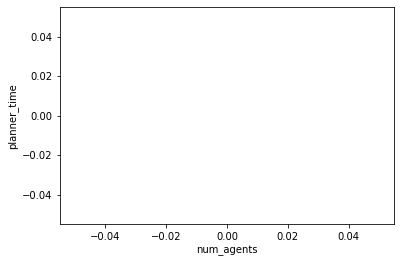

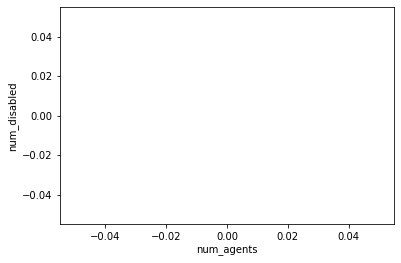

In [12]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 0:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()